In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:

df = pd.read_csv('/Users/vinayak/Desktop/my-projects/StockMarket/dataset/prices-split-adjusted.csv', header = 0)


In [3]:
print(df.shape)
df.head()

(851264, 7)


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
df['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [5]:
df_yahoo = df[df.symbol == 'YHOO']
print(df_yahoo.shape)
df_yahoo.head()

(1762, 7)


,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [6]:
df_yahoo.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,27.297917,27.291992,26.975602,27.609977,1.996907e+07
std,11.412612,11.406846,11.289736,11.526101,1.376851e+07
min,11.300000,11.090000,11.090000,11.800000,2.586900e+06
25%,15.950000,15.920000,15.770000,16.110001,1.235152e+07
50%,26.770001,26.750000,26.495000,27.105000,1.639070e+07
75%,37.335000,37.377500,36.897501,37.689999,2.325988e+07
max,52.279999,52.369999,51.639999,52.619999,2.338721e+08


In [7]:
df_yahoo.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'])
df_yahoo = df[df.symbol == 'YHOO']
df_yahoo = df_yahoo.set_index('date')
df_yahoo.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [9]:
# frequency to 'd' 
# defining entries for all the business days from start to end
# if data wasn't already present, it'll just add nan
# we will later want to eliminate the entries which were not
# national holidays
before_asfreq = df_yahoo.shape
print("before :", before_asfreq)
yahoo_data = df_yahoo.asfreq('b') # storing in a new variable
after_asfreq = yahoo_data.shape
print("after :", after_asfreq)

before : (1762, 6)
after : (1825, 6)


In [10]:
yahoo_data.isnull().sum()

symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

In [11]:
null_data = yahoo_data[yahoo_data.isnull().any(axis=1)]
null_data.head()
null_dates = null_data.index.tolist()

In [12]:
import calendar
import datetime

holidays = []
for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

#  we could not just add the holidays in the array directly
#  doing so would have thrown error while dropping entries from
#  the dataframe. if holiday was a weekend and in the array, invalid entry
#  will not get deleted from the df but an error will occur.
good_fridays = [ 
    datetime.date(2010,4,2), 
    datetime.date(2011,4,22), 
    datetime.date(2012,4,6), 
    datetime.date(2013,3,29), 
    datetime.date(2014,4,18), 
    datetime.date(2015,4,3), 
    datetime.date(2016,3,25) 
]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


In [13]:
modified_df = yahoo_data.drop(holidays)
updated_shape = modified_df.shape
updated_shape

(1764, 6)

In [14]:
modified_df = modified_df.bfill(axis='rows')
modified_df.isnull().sum()

symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [15]:
modified_df['close']

date
2010-01-04    17.100000
2010-01-05    17.230000
2010-01-06    17.170000
2010-01-07    16.700001
2010-01-08    16.700001
                ...    
2016-12-23    38.660000
2016-12-27    38.919998
2016-12-28    38.730000
2016-12-29    38.639999
2016-12-30    38.669998
Name: close, Length: 1764, dtype: float64

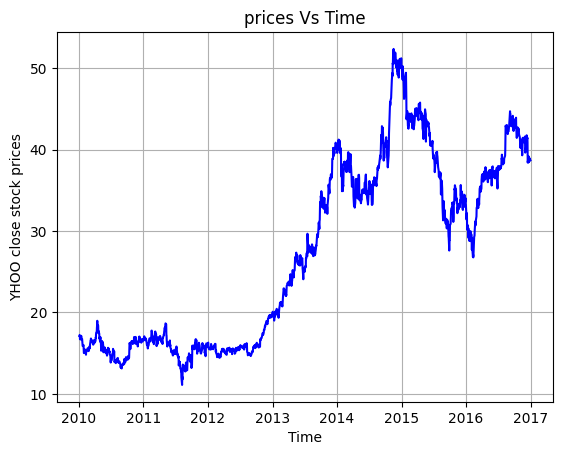

In [16]:
def plotter(ticker):
    global closing_stock
    plt.subplot(111)
#     company_close = modified_df[modified_df['symbol']==ticker]
#     company_close = company_close.close.values.astype('float32')
#     company_close = company_close.reshape(-1, 1)
    company_close = np.array(modified_df['close'].values.astype('float32')).reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(ticker + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(modified_df.index, closing_stock, 'b')
    plt.show()
    
plotter("YHOO")

In [17]:
n_train = int(len(closing_stock) * 0.80)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining * 0.50)
n_test = n_remaining - n_val

In [18]:
train_data = closing_stock[0 : n_train]
val_data = closing_stock[n_train : n_train + n_val]
test_data = closing_stock[-n_test : ]
print(train_data)

[[17.1 ]
 [17.23]
 [17.17]
 ...
 [37.25]
 [36.46]
 [36.67]]


In [19]:

from sklearn.preprocessing import MinMaxScaler


In [20]:

scaler = MinMaxScaler(feature_range=(0,1))


In [21]:
train = scaler.fit_transform(train_data) # minmaxscaled train data
test = scaler.transform(test_data) # minmax of test data
val = scaler.transform(val_data) # minmax of val data

In [22]:
train.max()

0.99999994

In [23]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [24]:
n_features = 2

In [89]:
trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

In [90]:
print(valY.shape)

(173,)


In [91]:
trainX.shape

(1408, 2)

In [92]:
trainX = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
valX = valX.reshape(valX.shape[0], 1, valX.shape[1])
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

In [93]:
trainX

array([[[0.14559111, 0.14874032]],

       [[0.14874032, 0.14728683]],

       [[0.14728683, 0.13590118]],

       ...,

       [[0.6196705 , 0.62015504]],

       [[0.62015504, 0.6305717 ]],

       [[0.6305717 , 0.63372093]]], dtype=float32)

In [94]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [95]:
tf.random.set_seed(42)

In [96]:
model = keras.Sequential()

In [97]:
#GRU LAYERS

#First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1, n_features), activation='tanh'))
# model.add(layers.Dropout(0.2))

#Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1, n_features)))
# model.add(layers.Dropout(0.2))

#Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
# model.add(layers.Dropout(0.2))

#Output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

In [98]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ['mean_squared_error'])


In [99]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 1, 100)            31200     
                                                                 
 gru_4 (GRU)                 (None, 1, 150)            113400    
                                                                 
 gru_5 (GRU)                 (None, 100)               75600     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 220301 (860.55 KB)
Trainable params: 220301 (860.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [100]:
trainX

array([[[0.14559111, 0.14874032]],

       [[0.14874032, 0.14728683]],

       [[0.14728683, 0.13590118]],

       ...,

       [[0.6196705 , 0.62015504]],

       [[0.62015504, 0.6305717 ]],

       [[0.6305717 , 0.63372093]]], dtype=float32)

In [101]:
#--- RUNNING THE MODEL -------- RUNNING THE MODEL -----#
history = model.fit(trainX, trainY, 
                    epochs = 100, 
                    batch_size = 128, 
                    verbose = 1, 
                    validation_data = (valX, valY))
#--- RUNNING THE MODEL -------- RUNNING THE MODEL -----#

Epoch 1/100
11/11 [==============================] - 1s 28ms/step - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 6.6389e-04 - val_mean_squared_error: 6.6389e-04
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 6.4021e-04 - val_mean_squared_error: 6.4021e-04
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 3.9391e-04 - mean_squared_error: 3.9391e-04 - val_loss: 4.3686e-04 - val_mean_squared_error: 4.3686e-04
E

11/11 [==============================] - 0s 4ms/step - loss: 1.8577e-04 - mean_squared_error: 1.8577e-04 - val_loss: 3.5876e-04 - val_mean_squared_error: 3.5876e-04
Epoch 48/100
11/11 [==============================] - 0s 4ms/step - loss: 1.8449e-04 - mean_squared_error: 1.8449e-04 - val_loss: 3.6806e-04 - val_mean_squared_error: 3.6806e-04
Epoch 49/100
11/11 [==============================] - 0s 3ms/step - loss: 1.8418e-04 - mean_squared_error: 1.8418e-04 - val_loss: 3.5756e-04 - val_mean_squared_error: 3.5756e-04
Epoch 50/100
11/11 [==============================] - 0s 3ms/step - loss: 1.7891e-04 - mean_squared_error: 1.7891e-04 - val_loss: 3.5816e-04 - val_mean_squared_error: 3.5816e-04
Epoch 51/100
11/11 [==============================] - 0s 3ms/step - loss: 1.7907e-04 - mean_squared_error: 1.7907e-04 - val_loss: 3.7979e-04 - val_mean_squared_error: 3.7979e-04
Epoch 52/100
11/11 [==============================] - 0s 3ms/step - loss: 1.8697e-04 - mean_squared_error: 1.8697e-04 - val

11/11 [==============================] - 0s 4ms/step - loss: 1.6723e-04 - mean_squared_error: 1.6723e-04 - val_loss: 3.4359e-04 - val_mean_squared_error: 3.4359e-04
Epoch 94/100
11/11 [==============================] - 0s 4ms/step - loss: 1.6559e-04 - mean_squared_error: 1.6559e-04 - val_loss: 3.3650e-04 - val_mean_squared_error: 3.3650e-04
Epoch 95/100
11/11 [==============================] - 0s 4ms/step - loss: 1.6246e-04 - mean_squared_error: 1.6246e-04 - val_loss: 3.3520e-04 - val_mean_squared_error: 3.3520e-04
Epoch 96/100
11/11 [==============================] - 0s 4ms/step - loss: 1.6393e-04 - mean_squared_error: 1.6393e-04 - val_loss: 3.3315e-04 - val_mean_squared_error: 3.3315e-04
Epoch 97/100
11/11 [==============================] - 0s 4ms/step - loss: 1.6560e-04 - mean_squared_error: 1.6560e-04 - val_loss: 3.3068e-04 - val_mean_squared_error: 3.3068e-04
Epoch 98/100
11/11 [==============================] - 0s 4ms/step - loss: 1.6164e-04 - mean_squared_error: 1.6164e-04 - val

In [102]:
import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00017 , RMSE: 0.01
Validation Score:
MSE: 0.00034 , RMSE: 0.02
Test Score:
MSE: 0.00024 , RMSE: 0.02


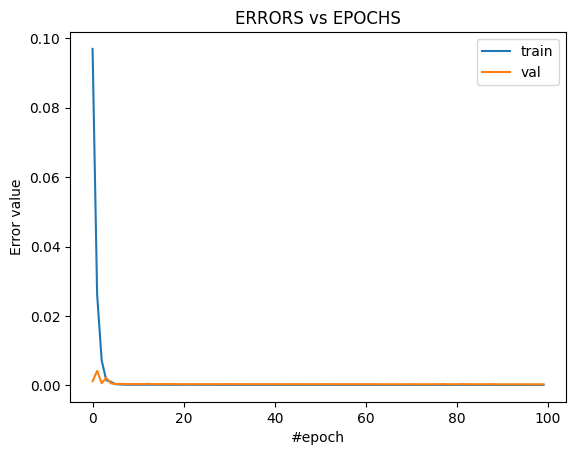

In [103]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ERRORS vs EPOCHS')
plt.ylabel('Error value')
plt.xlabel('#epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [104]:
testX

array([[[0.6438953 , 0.63929266]],

       [[0.63929266, 0.63323647]],

       [[0.63323647, 0.6303295 ]],

       [[0.6303295 , 0.6264535 ]],

       [[0.6264535 , 0.6177326 ]],

       [[0.6177326 , 0.6179748 ]],

       [[0.6179748 , 0.61627907]],

       [[0.61627907, 0.60368216]],

       [[0.60368216, 0.6034399 ]],

       [[0.6034399 , 0.6262112 ]],

       [[0.6262112 , 0.63323647]],

       [[0.63323647, 0.63202524]],

       [[0.63202524, 0.6383236 ]],

       [[0.6383236 , 0.6366279 ]],

       [[0.6366279 , 0.62839144]],

       [[0.62839144, 0.61506784]],

       [[0.61506784, 0.63929266]],

       [[0.63929266, 0.63420546]],

       [[0.63420546, 0.63347876]],

       [[0.63347876, 0.6281493 ]],

       [[0.6281493 , 0.61555237]],

       [[0.61555237, 0.61942834]],

       [[0.61942834, 0.6405039 ]],

       [[0.6405039 , 0.59350777]],

       [[0.59350777, 0.6218507 ]],

       [[0.6218507 , 0.64752907]],

       [[0.64752907, 0.65043604]],

       [[0.65043604, 0.61918

In [106]:
pred = model.predict(testX)
print(pred)
# pred = scaler.inverse_transform(pred)
# testY_actual = testY.reshape(testY.shape[0], 1)
# testY_actual = scaler.inverse_transform(testY_actual)
# # plt.plot(modified_df.index[n_train: n_test + n_train], testY_actual, 'g')
# plt.plot(testY_actual, 'g')
# plt.plot(pred, 'r')
# plt.xlabel('Time')
# plt.ylabel('Stock Prices')
# plt.title('Model performance')
# plt.legend(['Actual', 'Predicted'], loc='lower right')
# plt.grid(True)
# plt.show()

6/6 [==============================] - 0s 1ms/step
[[0.63722134]
 [0.6315088 ]
 [0.6279944 ]
 [0.6243446 ]
 [0.61666644]
 [0.6151037 ]
 [0.6138108 ]
 [0.60350204]
 [0.6007701 ]
 [0.618744  ]
 [0.6288837 ]
 [0.62933576]
 [0.6340753 ]
 [0.6339971 ]
 [0.62714195]
 [0.61494803]
 [0.63143694]
 [0.63227534]
 [0.6306801 ]
 [0.62631834]
 [0.61528265]
 [0.61581504]
 [0.6332716 ]
 [0.60033107]
 [0.6132901 ]
 [0.6393168 ]
 [0.6467619 ]
 [0.62263155]
 [0.62593865]
 [0.61783195]
 [0.62416184]
 [0.61993384]
 [0.62287796]
 [0.6313294 ]
 [0.6232126 ]
 [0.6137819 ]
 [0.62985456]
 [0.6328447 ]
 [0.6337974 ]
 [0.6255146 ]
 [0.6300336 ]
 [0.6338433 ]
 [0.6336112 ]
 [0.64146507]
 [0.61399996]
 [0.58694255]
 [0.5976715 ]
 [0.6174054 ]
 [0.6348195 ]
 [0.64645934]
 [0.6391567 ]
 [0.636971  ]
 [0.6372112 ]
 [0.6414751 ]
 [0.64675736]
 [0.64648247]
 [0.64135385]
 [0.64627254]
 [0.6432258 ]
 [0.64646876]
 [0.6517979 ]
 [0.6668459 ]
 [0.6694124 ]
 [0.6793195 ]
 [0.66158044]
 [0.6648891 ]
 [0.6650989 ]
 [0.6619352

In [81]:
import yfinance as yf
import datetime
ticker = "AAPL"
# today = datetime.datetime.now().strftime('%Y-%m-%d')
stocks = yf.download(ticker, end='2023-07-18')
print(stocks['Close'])

[*********************100%***********************]  1 of 1 completed
Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2023-07-11    188.080002
2023-07-12    189.770004
2023-07-13    190.539993
2023-07-14    190.690002
2023-07-17    193.990005
Name: Close, Length: 10737, dtype: float64


In [82]:
pred

array([[37.437004],
       [37.202244],
       [37.053955],
       [36.903996],
       [36.5912  ],
       [36.518066],
       [36.46646 ],
       [36.05065 ],
       [35.925987],
       [36.647102],
       [37.081245],
       [37.107788],
       [37.296547],
       [37.300945],
       [37.023796],
       [36.524536],
       [37.17038 ],
       [37.233   ],
       [37.1629  ],
       [36.98698 ],
       [36.537678],
       [36.544018],
       [37.249218],
       [35.952198],
       [36.41636 ],
       [37.4947  ],
       [37.824223],
       [36.859257],
       [36.954662],
       [36.64376 ],
       [36.881897],
       [36.72581 ],
       [36.83415 ],
       [37.18027 ],
       [36.865505],
       [36.47195 ],
       [37.106594],
       [37.253544],
       [37.28945 ],
       [36.95907 ],
       [37.12739 ],
       [37.29043 ],
       [37.284298],
       [37.598316],
       [36.50815 ],
       [35.37753 ],
       [35.778816],
       [36.594536],
       [37.317135],
       [37.804535],


In [83]:
!which python

python not found
